In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import kagglehub
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten

# dataset
path = kagglehub.dataset_download("khoongweihao/covid19-xray-dataset-train-test-sets")

IMG_SIZE = (224, 224)  # image sizes

# Define paths
train_data = path+"/xray_dataset_covid19/train"
test_data = path+ "/xray_dataset_covid19/test"

# Data Augmentation and Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,           # Normalize pixel values
    shear_range=0.2,          # Apply random transformations
    zoom_range=0.2,
    horizontal_flip=True,
)

test_datagen = ImageDataGenerator(rescale=1./255)  # Only normalize test data

# Loading the training and test datasets
train_generator = train_datagen.flow_from_directory(
    train_data,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='binary'  # For binary classification
)

test_generator = test_datagen.flow_from_directory(
    test_data,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='binary'
)


Using Colab cache for faster access to the 'covid19-xray-dataset-train-test-sets' dataset.
Found 148 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


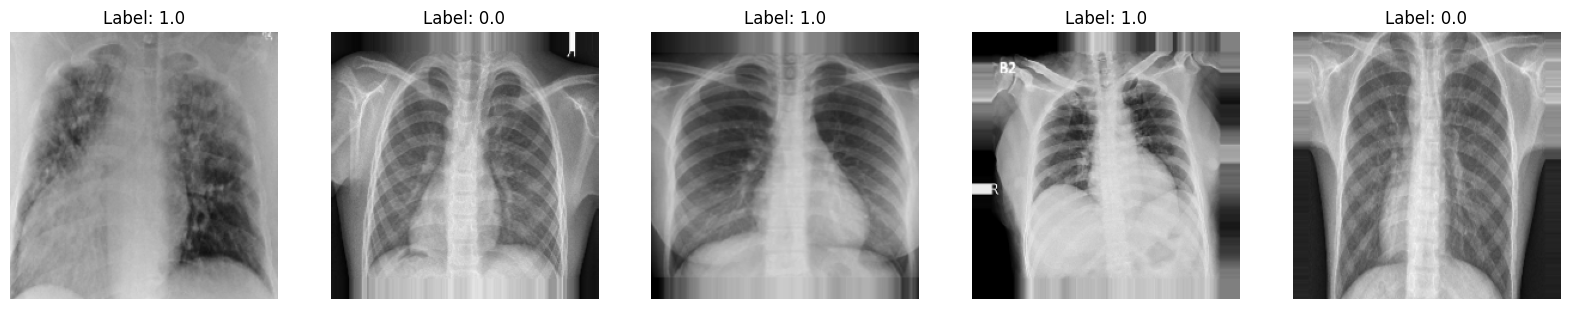

In [4]:
import matplotlib.pyplot as plt

# Get batch of images and labels from the test generator
# For test_generator
# images, labels = next(test_generator)

# For train_generator
images, labels = next(train_generator)


# Plot the first few images
fig, axes = plt.subplots(1, 5, figsize=(20, 20))  # Create a 1x5 subplot for displaying 5 images
for i in range(5):
    axes[i].imshow(images[i])  # Display the image
    axes[i].set_title(f'Label: {labels[i]}')  # Set the title as the label
    axes[i].axis('off')

plt.show()


In [7]:
# initialize dnn model
model = Sequential()

# Add a Flatten layer to convert 3D image input to 1D
model.add(Flatten(input_shape=(224, 224, 3)))

# Input layer
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))

# Output layer (Sigmoid for binary classification)
model.add(Dense(1, activation='sigmoid'))


# view model summary
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │    19,267,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,284,353 (73.56 MB)

 Trainable params: 19,284,353 (73.56 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Compile model
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Binary classification loss function
              metrics=['accuracy'])


# Train the model without explicitly setting validation_steps
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples,
    epochs=10,
    validation_data=test_generator
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
  5/148 ━━━━━━━━━━━━━━━━━━━━ 3:08 1s/step - accuracy: 0.4974 - loss: 20.8115

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


148/148 ━━━━━━━━━━━━━━━━━━━━ 10s 49ms/step - accuracy: 0.4673 - loss: 24.6121 - val_accuracy: 0.7250 - val_loss: 1.4628
Epoch 2/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - accuracy: 0.7140 - loss: 3.9779 - val_accuracy: 0.9500 - val_loss: 0.3158
Epoch 3/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - accuracy: 0.8649 - loss: 1.2806 - val_accuracy: 1.0000 - val_loss: 0.0096
Epoch 4/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - accuracy: 0.8300 - loss: 1.0162 - val_accuracy: 0.8500 - val_loss: 0.5698
Epoch 5/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - accuracy: 0.6955 - loss: 1.6712 - val_accuracy: 0.9250 - val_loss: 0.1828
Epoch 6/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 14s 79ms/step - accuracy: 0.7650 - loss: 1.1007 - val_accuracy: 0.9000 - val_loss: 0.3424
Epoch 7/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - accuracy: 0.7853 - loss: 1.5453 - val_accuracy: 1.0000 - val_loss: 0.0118
Epoch 8/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - accuracy: 0.8313 - loss: 0.9564 - val_accuracy: 1

In [9]:
# Evaluate on the test dataset
loss, accuracy = model.evaluate(test_generator)
print(f'Accuracy: {accuracy*100:.2f}%')
print(f'Loss: {loss*100:.4f}%')

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 170ms/step - accuracy: 0.9563 - loss: 0.1033
Accuracy: 95.00%
Loss: 12.2971%


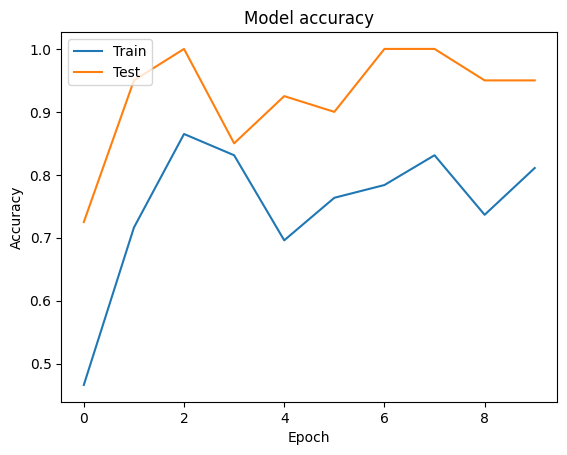

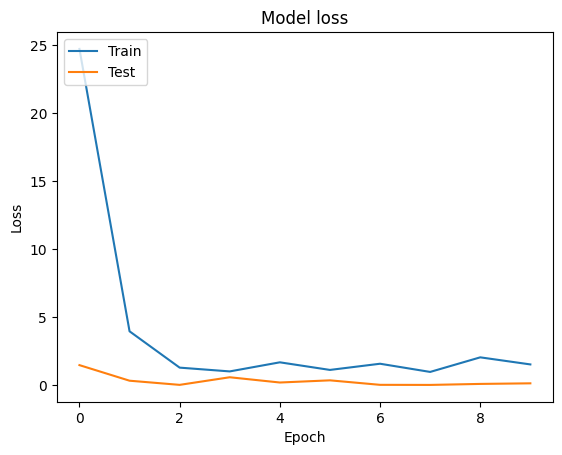

In [10]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 146ms/step
Accuracy: 0.50
Precision: 20.00
Recall: 22.00
F1 Score: 20.95


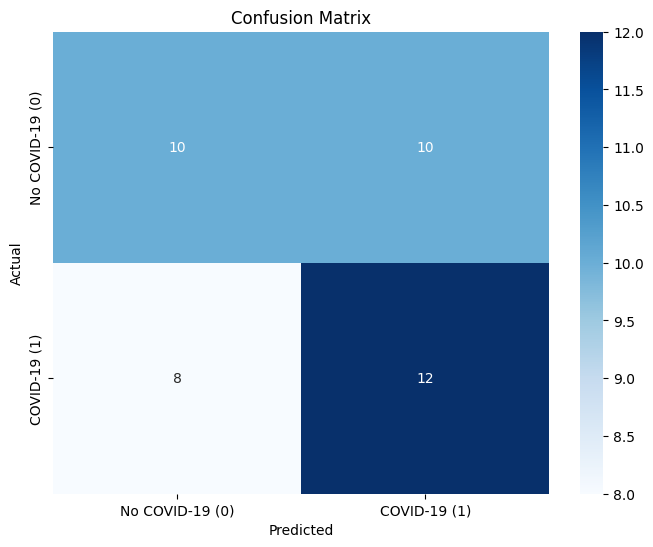

                 precision    recall  f1-score   support

No COVID-19 (0)       0.56      0.50      0.53        20
   COVID-19 (1)       0.55      0.60      0.57        20

       accuracy                           0.55        40
      macro avg       0.55      0.55      0.55        40
   weighted avg       0.55      0.55      0.55        40



In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


# Get the true labels and predictions
true_labels = test_generator.classes  # Actual labels
predictions = model.predict(test_generator)  # Model predictions
predicted_labels = (predictions > 0.5).astype(int)  # Convert probabilities to binary (0 or 1)

# Calculate evaluation metrics
accuracy = np.mean(predicted_labels == true_labels)
precision = np.sum((predicted_labels == 1) & (true_labels == 1)) / np.sum(predicted_labels == 1)  # TP / (TP + FP)
recall = np.sum((predicted_labels == 1) & (true_labels == 1)) / np.sum(true_labels == 1)  # TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)  # Harmonic mean of precision and recall

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1_score:.2f}")

# Generate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No COVID-19 (0)', 'COVID-19 (1)'], yticklabels=['No COVID-19 (0)', 'COVID-19 (1)'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Detailed classification report
report = classification_report(true_labels, predicted_labels, target_names=['No COVID-19 (0)', 'COVID-19 (1)'])
print(report)

In [ ]:
# Save the model in HDF5 format
model.save('pneumonia_classification_modelDNN.h5')

# Later, reload the model
from tensorflow.keras.models import load_model

# Load the model
model = load_model('/content/drive/MyDrive/pneumonia_classification_modelDNN.h5')

# Evaluate the loaded model
loss, accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {accuracy*100:.2f}%')
print(f'Test Loss: {loss*100:.4f}%')
# Predict using the loaded model
predictions = model.predict(test_generator)

# print(predictions)